In [92]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.model_selection import GridSearchCV,train_test_split
import seaborn as sns
from statistics import mean

In [3]:
delivery_train=pd.read_csv("delivery_time_train_data.csv")
delivery_test=pd.read_csv("delivery_time_test_data.csv")
student_train=pd.read_csv("student_train_data.csv")
student_test=pd.read_csv("student_test_data.csv")

In [4]:
print(delivery_train.head(),delivery_test.head(),student_train.head(),student_test.head())


   Miles  Deliveries  Time
0    100           4   9.3
1     50           3   4.8
2    100           4   8.9
3    100           2   6.5
4     50           2   4.2    Miles  Deliveries  Time
0     50           3   4.6
1     65           2   5.5
2     80           1   6.3
3     70           1   6.2
4     70           5   8.5     GPA  Age  Dropped
0  3.78   21        0
1  2.38   27        0
2  3.05   21        1
3  2.19   28        1
4  3.22   23        0     GPA  Age  Dropped
0  2.49   26        1
1  2.67   29        0
2  2.86   29        1
3  2.21   26        0
4  2.91   20        1


In [5]:
X_delivery_train=delivery_train[['Miles','Deliveries']]
y_delivery_train=delivery_train[['Time']]

X_delivery_test=delivery_test[['Miles','Deliveries']]
y_delivery_test=delivery_test[['Time']]

X_student_train=student_train[['GPA','Age']]
y_student_train=student_train[['Dropped']]

X_student_test=student_test[['GPA','Age']]
y_student_test=student_test[['Dropped']]

In [6]:
print(X_delivery_train.shape,y_delivery_train.shape,X_delivery_test.shape,y_delivery_test.shape,
     X_student_train.shape,y_student_train.shape,X_student_test.shape,y_student_test.shape)

(199, 2) (199, 1) (101, 2) (101, 1) (400, 2) (400, 1) (100, 2) (100, 1)


In [6]:
def knn_predict(X_train,y_train,X_test,k):
    y_pred=[]
                                                          
    for i in range(0,len(X_test)):
        pred_df = pd.DataFrame(0,index=range(len(X_train)),columns=['y_train','distance'])
        
        for j in range(0,len(X_train)):
            sqr=((X_test.iloc[i][0]-X_train.iloc[j][0])**2+(X_test.iloc[i][1]-X_train.iloc[j][1])**2)
            
            pred_df['y_train'][j]=y_train.iloc[j]
            pred_df['distance'][j]=sqr**.5
            pred_df['distance'] = pred_df['distance'].astype(float)
            
        neighbor_df=pred_df.nsmallest(k, 'distance')
        y_pred.append(neighbor_df["y_train"].mean())
        
    return(y_pred)


y_delivery_test_pred=(knn_predict(X_delivery_train,y_delivery_train,X_delivery_test,30))    
y_delivery_train_pred=(knn_predict(X_delivery_train,y_delivery_train,X_delivery_train,30)) 


In [7]:
def mse(test,test_pred):
    test['predictions']=test_pred
    test['sq_err']=(test['Time']-test['predictions'])**2
    return(test['sq_err'].mean())

print(mse(y_delivery_test,y_delivery_test_pred),mse(y_delivery_train,y_delivery_train_pred))


1.703556411966999 1.3402410652814878


<AxesSubplot:xlabel='k_neighbors'>

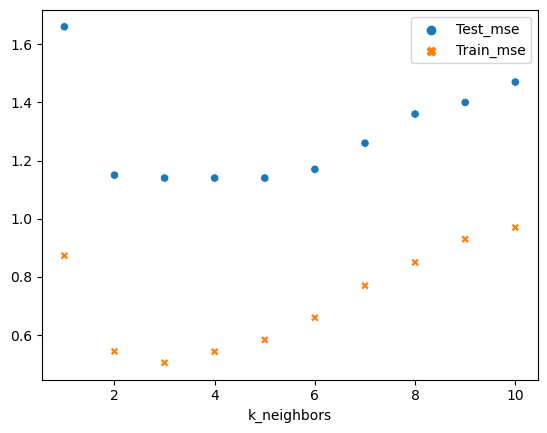

In [18]:
mse_lst=[[1.66,.873],[1.15,.544],[1.14,.505],[1.14,.543],[1.14,.584],[1.17,.66],[1.26,.77]
         ,[1.36,.85],[1.4,.93],[1.47,.97]]

mse_df = pd.DataFrame(mse_lst, columns =['Test_mse', 'Train_mse'])
mse_df.index = mse_df.index + 1
mse_df = mse_df.rename_axis('k_neighbors')
sns.scatterplot(data=mse_df)

In [7]:
KNN_reg= KNeighborsRegressor()
KNN_reg = KNN_reg.fit(X_delivery_train,y_delivery_train)


In [8]:
y_train_pred = KNN_reg.predict(X_delivery_train)
y_test_pred = KNN_reg.predict(X_delivery_test)


In [9]:
mean_squared_error(y_delivery_train,y_train_pred) 

0.5970894472361807

In [10]:
mean_squared_error(y_delivery_test,y_test_pred) 

1.142752475247525

In [11]:
pipe = Pipeline([('scaler', StandardScaler()), ('KNN', KNeighborsRegressor())])
preds=pipe.fit(X_delivery_train, y_delivery_train)

In [12]:
stsc=StandardScaler() 
X_delivery_test =stsc.fit_transform(X_delivery_test)
KNN_reg=KNN_reg.fit(X_delivery_test,y_delivery_test)
y_test_pred2 = KNN_reg.predict(X_delivery_test)

mean_squared_error(y_delivery_test,y_test_pred2) 

0.68630099009901

In [13]:
rf=RandomForestRegressor()
X_delivery_train =stsc.fit_transform(X_delivery_train)
rf = rf.fit(X_delivery_train,y_delivery_train)
y_delivery_train_pred3 = rf.predict(X_delivery_train)
y_delivery_test_pred3 = rf.predict(X_delivery_test)

mean_squared_error(y_delivery_train,y_delivery_train_pred3)

0.4331277631071983

In [14]:
mean_squared_error(y_delivery_test,y_delivery_test_pred3)

1.0744716817946216

In [15]:
def knn_predict_class(X_train,y_train,X_test,k=5):
    y_pred=[]
                                                          
    for i in range(0,len(X_test)):
        pred_df2 = pd.DataFrame(0,index=range(len(X_train)),columns=['y_train','distance'])
        
        for j in range(0,len(X_train)):
            sqr=((X_test[i][0]-X_train[j][0])**2+(X_test[i][1]-X_train[j][1])**2)
            
            pred_df2['y_train'][j]=y_train['Dropped'][j]
            pred_df2['distance'][j]=sqr**.5
            pred_df2['distance'] = pred_df2['distance'].astype(float)
            
        neighbor_df2=pred_df2.nsmallest(k, 'distance')
        y_pred.append(neighbor_df2["y_train"].mode())
       
        #print(c.dtype)
    return(y_pred)

In [62]:

X_student_train =stsc.fit_transform(X_student_train)
X_student_test=stsc.fit_transform(X_student_test)
y_student_test_pred=(knn_predict_class(X_student_train,y_student_train,X_student_test,5))  



In [63]:
def overall_accuracy(y,y_pred):
    counter=0
    for pr in range (len(y)):
        if(y[pr]==y_pred[pr][0])==True:
            counter +=1
    return(counter/(len(y)))

overall_accuracy(y_student_test["Dropped"],np.array(y_student_test_pred))


0.72

In [81]:
neigh = KNeighborsClassifier()
k_range = list(range(1, 100))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(neigh, param_grid, cv=10, scoring='accuracy',verbose=1)
gs=grid.fit(X_student_train,y_student_train)
print(gs.best_params_)


Fitting 10 folds for each of 99 candidates, totalling 990 fits
{'n_neighbors': 50} 0.7125


In [84]:
neigh2 = KNeighborsClassifier(n_neighbors=50)
neigh2.fit(X_student_train,y_student_train)
y_student_test_pred4=neigh2.predict(X_student_test) 
accuracy_score(y_student_test,y_student_test_pred4)

0.77

In [85]:
rf2=RandomForestClassifier()
rf2 = rf2.fit(X_student_train,y_student_train)
y_student_test_pred3 = rf2.predict(X_student_test)
print( accuracy_score(y_student_test,y_student_test_pred3))

0.65


In [138]:
h2o_df=pd.read_csv("h2o_potability.csv")
h2o_df=h2o_df.fillna(h2o_df.median())
h2o_df.sample(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
1555,7.033945,246.622871,15428.450920,7.570769,305.616422,516.217847,17.526819,91.602794,3.931731,1
461,7.163999,203.781598,34226.072130,9.412035,320.258917,415.577513,16.221044,90.184208,3.354322,0
106,7.036752,213.541932,22539.711610,6.957204,334.041186,463.398847,11.623019,69.615850,3.398593,0
1751,7.036752,237.705681,21862.753610,8.961425,318.172687,434.388304,11.665329,59.775642,3.943291,0
2273,7.393978,209.619214,17939.704700,7.233736,333.073546,349.209623,13.579349,68.152467,3.782728,0
737,6.446252,204.253563,11104.250510,7.648613,333.073546,418.041220,16.625627,66.622485,4.976958,1
2002,7.035037,220.501888,19746.493250,7.059383,371.912615,536.183900,15.303433,67.901758,4.557029,1
1456,7.036752,218.405545,11370.649170,6.866826,392.841907,284.551173,16.095520,66.622485,3.266562,0
2037,7.493291,216.381880,9465.323905,4.947531,341.460632,501.345347,11.247507,52.951363,3.748747,1
1803,6.530796,138.007672,19174.593250,7.347952,333.073546,490.644138,16.337949,66.622485,3.181635,0


In [128]:

potability_vec=h2o_df['Potability']
h2o_df.drop(columns=['Potability'],inplace=True)
stsc.fit(h2o_df)

StandardScaler()

In [129]:
h2o_train, h2o_test, pot_train, pot_test = train_test_split(h2o_df, potability_vec, test_size=0.3, random_state=42)

In [130]:
neigh3 = KNeighborsClassifier()
neigh3.fit(h2o_train,pot_train)
pot_train_prd=neigh3.predict(h2o_train)
accuracy_score(pot_train,pot_train_prd)

0.7030091583078936

In [131]:
grid2 = GridSearchCV(neigh3, param_grid, cv=10, scoring='accuracy',verbose=1)
gs2=grid2.fit(h2o_train,pot_train)
print(gs2.best_params_)


Fitting 10 folds for each of 99 candidates, totalling 990 fits
{'n_neighbors': 94}


In [137]:
neigh4 = KNeighborsClassifier(n_neighbors=94)
neigh4.fit(h2o_train,pot_train)
pot_train_prd2=neigh4.predict(h2o_train) 
pot_test_prd=neigh4.predict(h2o_test) 
print(accuracy_score(pot_train,pot_train_prd2),accuracy_score(pot_test,pot_test_prd))

0.6044483209768862 0.6215666327568667
